In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use only one styling approach (Seaborn recommended)
sns.set_theme(style='whitegrid', context='notebook')

# Optional: If you want bigger plots by default
plt.rcParams['figure.figsize'] = (10, 6)

In [19]:
# Load the dataset with low_memory=False to reduce dtype warnings
df = pd.read_csv('/kaggle/input/india-air-quality-data/data.csv', 
                 encoding='latin1', 
                 low_memory=False)

# Show initial dataset shape
print("Initial Dataset Shape:", df.shape)

# Basic overview
print("\nColumns:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)

# Look at the top rows
display(df.head())

# Optional: Look at random rows
display(df.sample(5))

# Optional: Look at bottom rows
display(df.tail())

Initial Dataset Shape: (435742, 13)

Columns: ['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type', 'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5', 'date']

Data Types:
stn_code                        object
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station     object
pm2_5                          float64
date                            object
dtype: object


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
118369,563,22/09/2012,Himachal Pradesh,Baddi,Himachal Pradesh State Environment Proection &...,"Residential, Rural and other Areas",1.0,13.0,63.0,NaN,Housing Board,NaN,2012-09-22
292826,61,August - M081997,Punjab,Ludhiana,Punjab Pollution Control Board,Industrial Area,20.3,44.9,NaN,295.0,NaN,NaN,1997-08-01
39246,603,17-12-13,Assam,Guwahati,Assam State Pollution Control Board,"Residential, Rural and other Areas",4.0,13.0,23.0,NaN,"Boargaon, Dist- Kamrup,Guwahati",NaN,2013-12-17
196792,797,14-05-15,Madhya Pradesh,Bhopal,Madhya Pradesh State Pollution Control Board,"Residential, Rural and other Areas",6.0,33.0,272.0,NaN,"AKVN Office, Industrial Area Mandideep, Raisen",331.0,2015-05-14
324058,NaN,25/04/2006,Rajasthan,Jaipur,NaN,Industrial Areas,3.6,18.4,50.0,171.0,MIA,NaN,2006-04-25


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", df.shape)

# Check missing values count and percentage
missing_counts = df.isnull().sum()
missing_percentage = (missing_counts / len(df)) * 100
print("\nMissing Values (Count):")
print(missing_counts)
print("\nMissing Values (Percentage):")
print(missing_percentage)

# If 'pm2_5' is mostly missing, drop it
if 'pm2_5' in df.columns:
    df.drop('pm2_5', axis=1, inplace=True)

# Convert 'stn_code' to string (it likely has mixed types)
if 'stn_code' in df.columns:
    df['stn_code'] = df['stn_code'].astype(str)

# Rename columns if needed
# 'rspm' → 'PM10' is common practice
if 'rspm' in df.columns:
    df.rename(columns={'rspm': 'PM10'}, inplace=True)

# If you want to rename 'spm' to 'SPM', uncomment:
# if 'spm' in df.columns:
#     df.rename(columns={'spm': 'SPM'}, inplace=True)

Shape after dropping duplicates: (435068, 12)

Missing Values (Count):
stn_code                            0
sampling_date                       3
state                               0
location                            3
agency                         149466
type                             5357
so2                             34632
no2                             16222
PM10                            40035
spm                            236908
location_monitoring_station     27303
date                                7
dtype: int64

Missing Values (Percentage):
stn_code                        0.000000
sampling_date                   0.000690
state                           0.000000
location                        0.000690
agency                         34.354630
type                            1.231302
so2                             7.960135
no2                             3.728613
PM10                            9.202010
spm                            54.453097
location_monitoring_

In [22]:
# Convert 'date' column to datetime
# (If your dataset has a different date column, adjust accordingly)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    # Drop rows where date couldn't be parsed
    df.dropna(subset=['date'], inplace=True)
else:
    print("No 'date' column found; please adjust the code to your date column.")

# Create 'Year' and 'Month' columns for analysis
if 'date' in df.columns:
    df['Year'] = df['date'].dt.year
    df['Month'] = df['date'].dt.month

print("\nData types after date parsing:")
print(df.dtypes)

# Show a few rows to confirm date parsing
display(df.head())


Data types after date parsing:
stn_code                               object
sampling_date                          object
state                                  object
location                               object
agency                                 object
type                                   object
so2                                   float64
no2                                   float64
PM10                                  float64
spm                                   float64
location_monitoring_station            object
date                           datetime64[ns]
Year                                    int32
Month                                   int32
dtype: object


,stn_code,sampling_date,state,location,agency,type,so2,no2,PM10,spm,location_monitoring_station,date,Year,Month
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01,1990,2
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990,2
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01,1990,2
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01,1990,3
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990,3


In [24]:
# Define your pollutant columns (adjust as needed)
pollutant_cols = ['so2', 'no2', 'PM10', 'spm']

# Convert each pollutant column to numeric (coerce errors to NaN)
for col in pollutant_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing pollutant values with the median (simple approach)
for col in pollutant_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Final check of missing after fill
print("\nMissing Values after filling with median:")
print(df[pollutant_cols].isnull().sum())


Missing Values after filling with median:
so2     0
no2     0
PM10    0
spm     0
dtype: int64


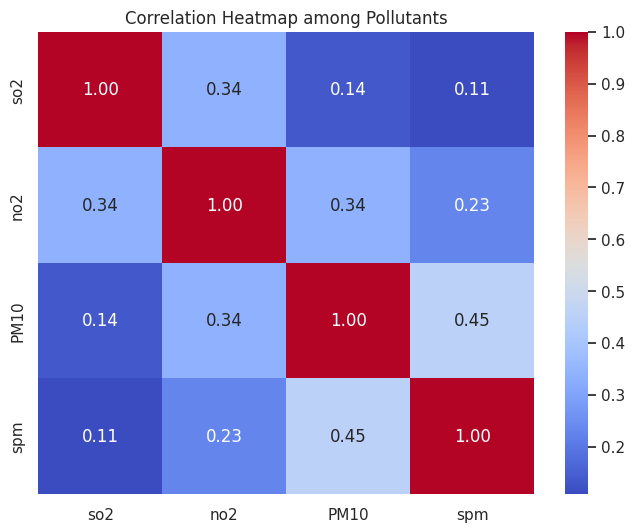

In [25]:
# Filter for existing pollutant columns in the DataFrame
available_pollutants = [col for col in pollutant_cols if col in df.columns]

# Create correlation heatmap
if len(available_pollutants) > 1:
    plt.figure(figsize=(8,6))
    corr = df[available_pollutants].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap among Pollutants')
    plt.show()
else:
    print("Not enough pollutant columns for correlation heatmap.")

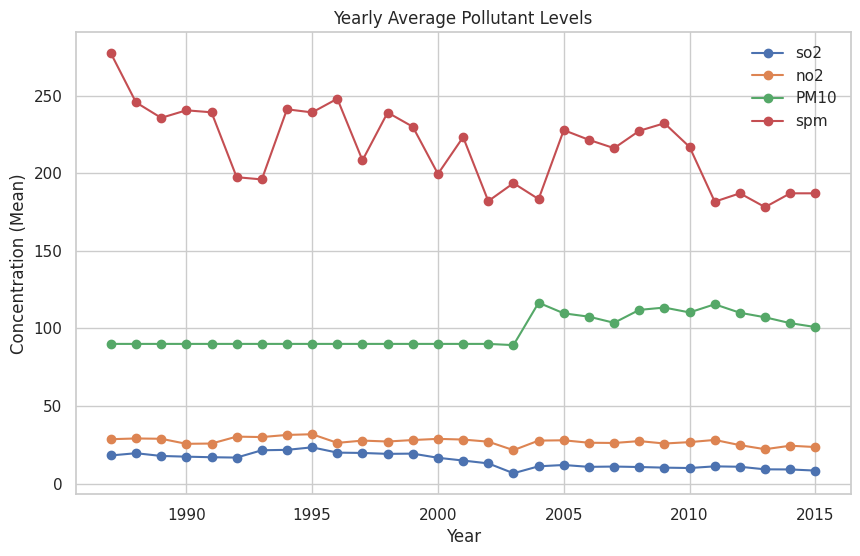

In [26]:
# Check if 'Year' exists and we have at least one pollutant
if 'Year' in df.columns and len(available_pollutants) > 0:
    yearly_data = df.groupby('Year')[available_pollutants].mean().reset_index()
    
    plt.figure(figsize=(10,6))
    for col in available_pollutants:
        plt.plot(yearly_data['Year'], yearly_data[col], marker='o', label=col)
    plt.title('Yearly Average Pollutant Levels')
    plt.xlabel('Year')
    plt.ylabel('Concentration (Mean)')
    plt.legend()
    plt.show()
else:
    print("Either 'Year' column doesn't exist or no pollutants found.")

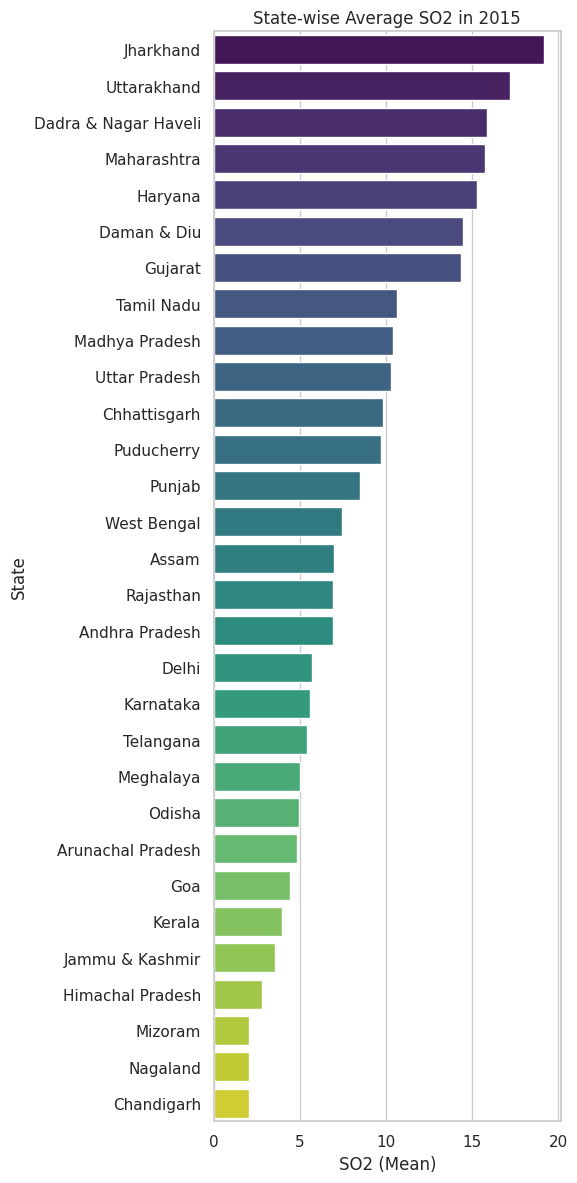


EDA & Visualization complete!


In [27]:
# Analyze pollutant levels by state for the most recent year
if 'Year' in df.columns and 'state' in df.columns:
    latest_year = df['Year'].max()
    df_latest = df[df['Year'] == latest_year].copy()
    
    # Example: state-wise average SO2
    if 'so2' in df_latest.columns:
        state_avg_so2 = df_latest.groupby('state')['so2'].mean().reset_index()
        state_avg_so2 = state_avg_so2.sort_values('so2', ascending=False)
        
        # Drop rows with missing state if needed
        state_avg_so2.dropna(subset=['state'], inplace=True)
        
        plt.figure(figsize=(6,12))
        sns.barplot(x='so2', y='state', data=state_avg_so2, palette='viridis')
        plt.title(f'State-wise Average SO2 in {latest_year}')
        plt.xlabel('SO2 (Mean)')
        plt.ylabel('State')
        plt.tight_layout()
        plt.show()
    else:
        print("Column 'so2' not found in the data.")
else:
    print("No 'Year' or 'state' column available for state-wise analysis.")

print("\nEDA & Visualization complete!")